# Lab | Feature extraction

In [1]:
#For this lab, we will be using the same dataset we used in the previous labs: categorical.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
!pip install squarify
import squarify as sq
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math

from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

### 1.Open the categorical dataframe we created before.

In [3]:
categorical_df = pd.read_csv('categorical.csv')
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2. Plot all the categorical variables with the proper plot. What can you see?

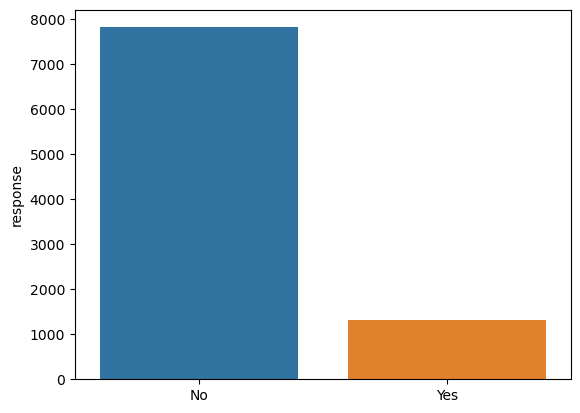

In [4]:
empstat = categorical_df.groupby(["response"])['response'].count()

a = sns.barplot(data=categorical_df, x=categorical_df['response'].unique(), y=empstat)

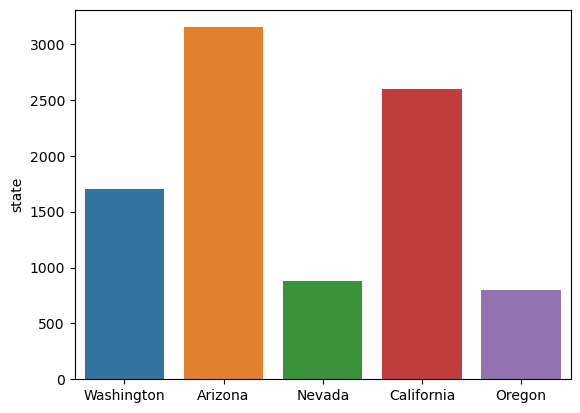

In [5]:
state = categorical_df.groupby(["state"])['state'].count()
b = sns.barplot(data=categorical_df, x=categorical_df['state'].unique(), y=state)

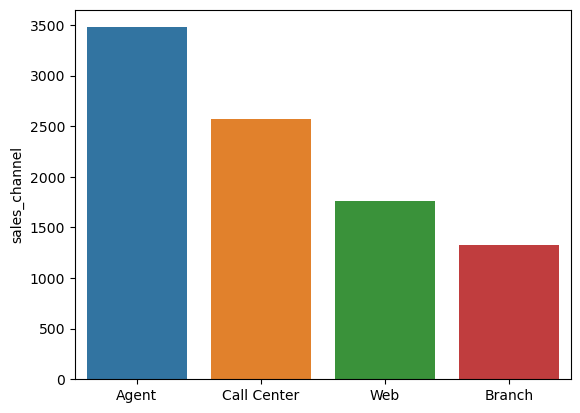

In [6]:
empstat = categorical_df.groupby(["sales_channel"])['sales_channel'].count()

c = sns.barplot(data=categorical_df, x=categorical_df['sales_channel'].unique(), y=empstat)

#sales_channel 

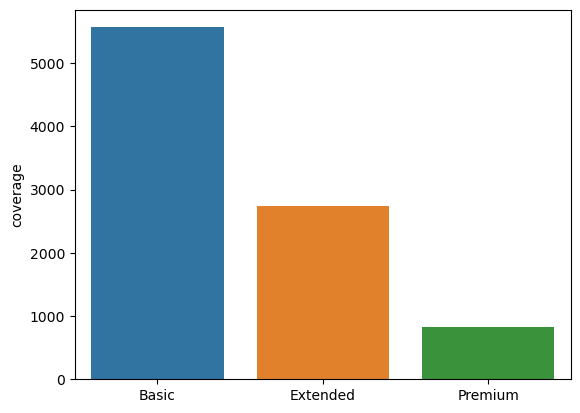

In [7]:
empstat = categorical_df.groupby(["coverage"])['coverage'].count()

d = sns.barplot(data=categorical_df, x=categorical_df['coverage'].unique(), y=empstat)

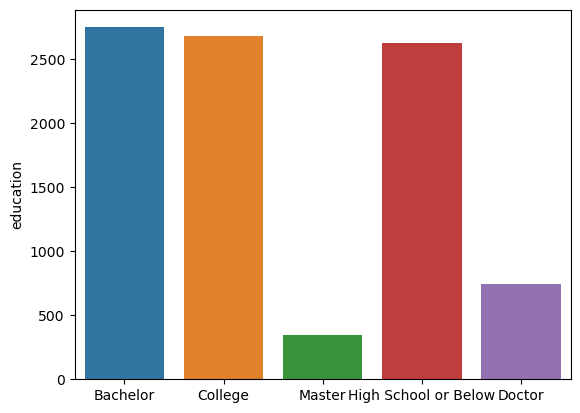

In [8]:
empstat = categorical_df.groupby(["education"])['education'].count()

e = sns.barplot(data=categorical_df, x=categorical_df['education'].unique(), y=empstat)

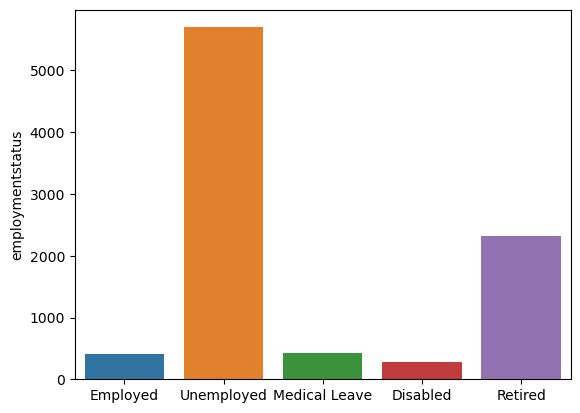

In [9]:
empstat = categorical_df.groupby(["employmentstatus"])['employmentstatus'].count()

f = sns.barplot(data=categorical_df, x=categorical_df['employmentstatus'].unique(), y=empstat)

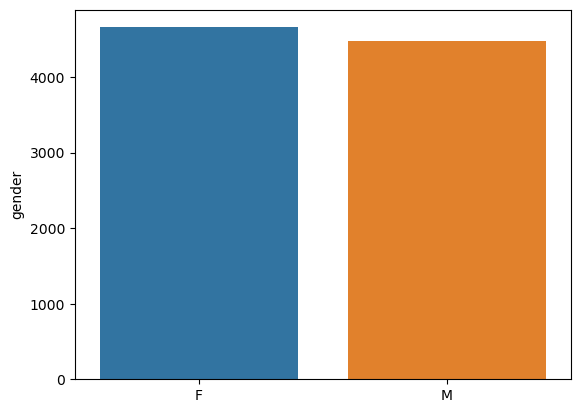

In [10]:
empstat = categorical_df.groupby(["gender"])['gender'].count()

g = sns.barplot(data=categorical_df, x=categorical_df['gender'].unique(), y=empstat)

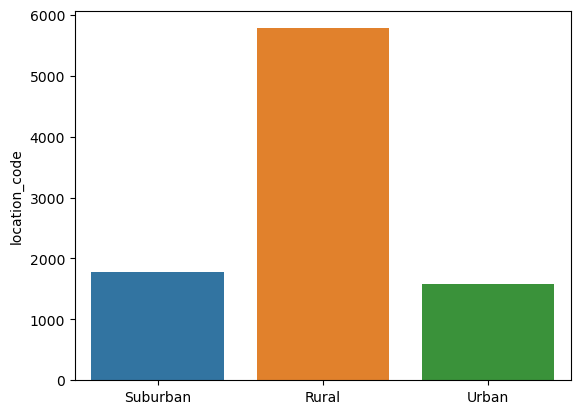

In [11]:
empstat = categorical_df.groupby(["location_code"])['location_code'].count()

h = sns.barplot(data=categorical_df, x=categorical_df['location_code'].unique(), y=empstat)

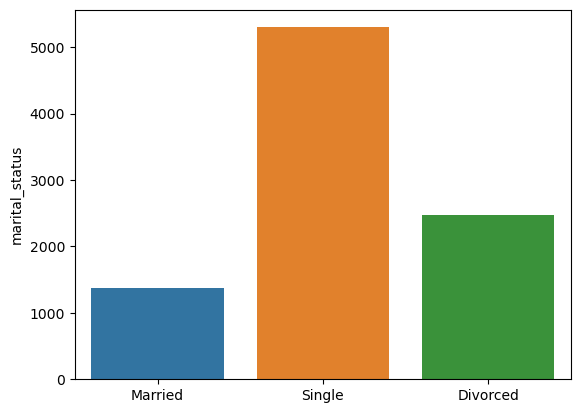

In [12]:
empstat = categorical_df.groupby(["marital_status"])['marital_status'].count()

i = sns.barplot(data=categorical_df, x=categorical_df['marital_status'].unique(), y=empstat)

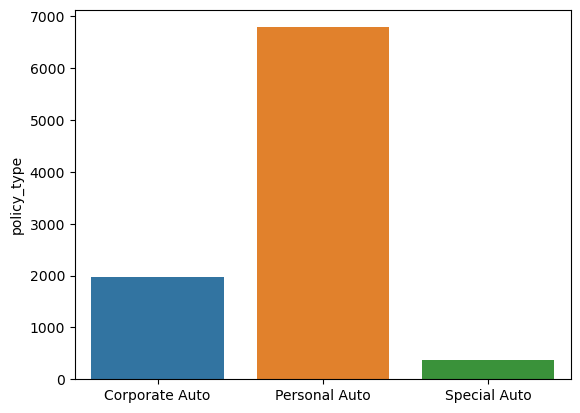

In [13]:
empstat = categorical_df.groupby(["policy_type"])['policy_type'].count()

j = sns.barplot(data=categorical_df, x=categorical_df['policy_type'].unique(), y=empstat)

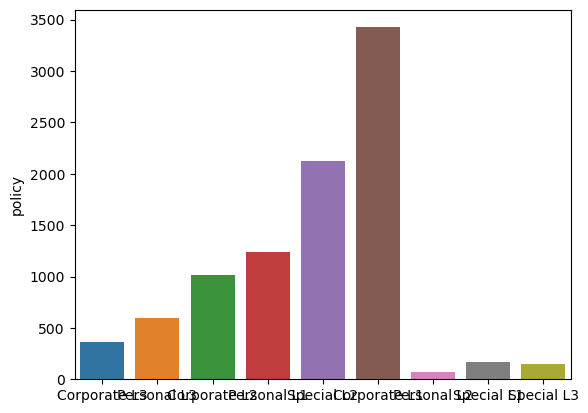

In [14]:
empstat = categorical_df.groupby(["policy"])['policy'].count()

k = sns.barplot(data=categorical_df, x=categorical_df['policy'].unique(), y=empstat)

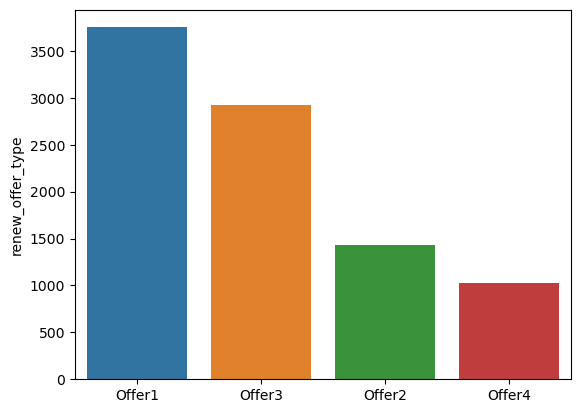

In [15]:
empstat = categorical_df.groupby(["renew_offer_type"])['renew_offer_type'].count()

l = sns.barplot(data=categorical_df, x=categorical_df['renew_offer_type'].unique(), y=empstat)

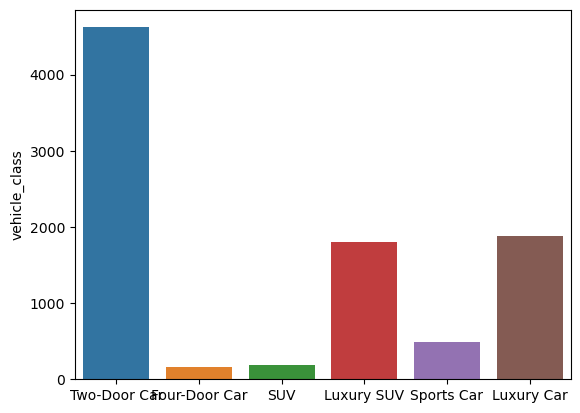

In [16]:
empstat = categorical_df.groupby(["vehicle_class"])['vehicle_class'].count()

m = sns.barplot(data=categorical_df, x=categorical_df['vehicle_class'].unique(), y=empstat)

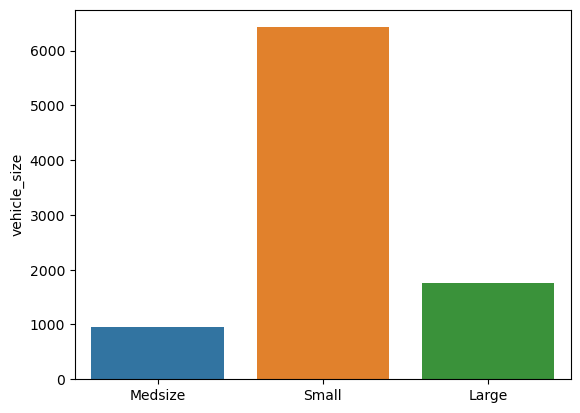

In [17]:
empstat = categorical_df.groupby(["vehicle_size"])['vehicle_size'].count()

n = sns.barplot(data=categorical_df, x=categorical_df['vehicle_size'].unique(), y=empstat)

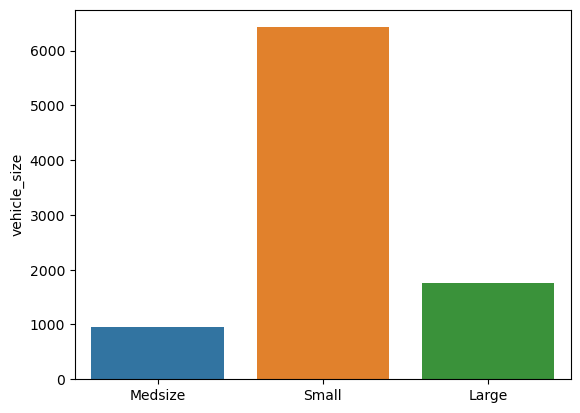

In [18]:
empstat = categorical_df.groupby(["vehicle_size"])['vehicle_size'].count()

o = sns.barplot(data=categorical_df, x=categorical_df['vehicle_size'].unique(), y=empstat)

### 3.There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [19]:
#There's some columns that give us redundant info, like policy_type and policy, so we can drop one of them. There's other ones that we can reduce the number of values to have a compact and useful data set, for example 'policy'. For the education one we can combine master & dr. For the  employment state, we can reduce to 3 into other. The gender one we can do oneHot encode. For vehicle size, we can do OneHot encode with luxury/sports. And with vehicle size we can do an ordinal encode. 

In [20]:
#dropping policy_type

categorical_df = categorical_df.drop(['policy_type'], axis=1)

In [22]:
#combine L1, L2, L3 in each respective category from policy column

categorical_df['policy'] = categorical_df['policy'].str.replace("L3","")
categorical_df['policy'] = categorical_df['policy'].str.replace("L2","")
categorical_df['policy'] = categorical_df['policy'].str.replace("L1","")

In [23]:
#combine master & dr values in a unique value from education column

categorical_df['education'] = categorical_df['education'].str.replace("Master","master_&_dr")
categorical_df['education'] = categorical_df['education'].str.replace("Doctor","master_&_dr")

In [24]:
#combine Medical Leave, Disabled and Retired values with Unemployed from employmentstatus column

categorical_df['employmentstatus'] = categorical_df['employmentstatus'].str.replace("Medical Leave","Unemployed")
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].str.replace("Disabled","Unemployed")
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].str.replace("Retired","Unemployed")

Employed      5698
Unemployed    3436
Name: employmentstatus, dtype: int64

In [25]:
#The gender one we can do oneHot encode

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'gender' column 
encoder_df = pd.DataFrame(encoder.fit_transform(categorical_df[['gender']]).toarray(),columns=['F','M'])


In [26]:
categorical_df = pd.concat([categorical_df,encoder_df], axis=1)

In [27]:
#dropping gender column

categorical_df = categorical_df.drop(['gender'], axis=1)

In [28]:
#We can do an ordinal encode to coverage column

encoder = OrdinalEncoder()

# Fit the encoder
encoder.fit(asarray(categorical_df['coverage']).reshape(-1,1))

# Transform the dataset
categorical_df['coverage_endoced'] = encoder.transform(asarray(categorical_df['coverage']).reshape(-1,1))

,state,response,coverage,education,employmentstatus,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,F,M,coverage_endoced
0,Washington,No,Basic,Bachelor,Employed,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize,1.0,0.0,0.0
1,Arizona,No,Extended,Bachelor,Unemployed,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize,1.0,0.0,1.0
2,Nevada,No,Premium,Bachelor,Employed,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize,1.0,0.0,2.0
3,California,No,Basic,Bachelor,Unemployed,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize,0.0,1.0,0.0
4,Washington,No,Basic,Bachelor,Employed,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,Urban,Married,Personal,Offer2,Web,Four-Door Car,Medsize,0.0,1.0,0.0
9130,California,Yes,Extended,College,Employed,Suburban,Divorced,Corporate,Offer1,Branch,Four-Door Car,Medsize,1.0,0.0,1.0
9131,California,No,Extended,Bachelor,Unemployed,Suburban,Single,Corporate,Offer1,Branch,Four-Door Car,Medsize,0.0,1.0,1.0
9132,California,No,Extended,College,Employed,Suburban,Married,Personal,Offer3,Branch,Four-Door Car,Large,0.0,1.0,1.0


In [29]:
#dropping coverage column

categorical_df = categorical_df.drop(['coverage'], axis=1)

In [30]:
#We can do an ordinal encode to location_code column

encoder2 = OrdinalEncoder()

# Fit the encoder
encoder2.fit(asarray(categorical_df['location_code']).reshape(-1,1))

# Transform the dataset
categorical_df['location_code_endoced'] = encoder2.transform(asarray(categorical_df['location_code']).reshape(-1,1))

In [31]:
#dropping coverage column

categorical_df = categorical_df.drop(['location_code'], axis=1)

,state,response,education,employmentstatus,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,F,M,coverage_endoced,location_code_endoced
0,Washington,No,Bachelor,Employed,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize,1.0,0.0,0.0,1.0
1,Arizona,No,Bachelor,Unemployed,Single,Personal,Offer3,Agent,Four-Door Car,Medsize,1.0,0.0,1.0,1.0
2,Nevada,No,Bachelor,Employed,Married,Personal,Offer1,Agent,Two-Door Car,Medsize,1.0,0.0,2.0,1.0
3,California,No,Bachelor,Unemployed,Married,Corporate,Offer1,Call Center,SUV,Medsize,0.0,1.0,0.0,1.0
4,Washington,No,Bachelor,Employed,Single,Personal,Offer1,Agent,Four-Door Car,Medsize,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Bachelor,Employed,Married,Personal,Offer2,Web,Four-Door Car,Medsize,0.0,1.0,0.0,2.0
9130,California,Yes,College,Employed,Divorced,Corporate,Offer1,Branch,Four-Door Car,Medsize,1.0,0.0,1.0,1.0
9131,California,No,Bachelor,Unemployed,Single,Corporate,Offer1,Branch,Four-Door Car,Medsize,0.0,1.0,1.0,1.0
9132,California,No,College,Employed,Married,Personal,Offer3,Branch,Four-Door Car,Large,0.0,1.0,1.0,1.0


### 4. Plot time variable. Can you extract something from it?

In [32]:
# We changed the time variable in the Lab: Cleaning numerical data + Lab Cleaning categorical data. Now we have to columns witg¡h month and day, and they are integers. 

### 5. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [33]:
#Already done in the Lab: Cleaning numerical data + Lab Cleaning categorical data

In [35]:
categorical_df.to_csv('categorical.csv',index=False)